# Stock Price Prediction

# Objective:
The objective of this project is to develop a predictive model that leverages historical stock price data to forecast future prices using an LSTM neural network. The model will be trained on a dataset containing daily stock prices, and its performance will be evaluated on unseen data.

# Install Required Library

In [1]:
# pip install yfinance

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Data Collection

In [3]:
import yfinance as yf

# Specify the stock symbol and the date range
symbol = "TCS.NS"
start_date = "1875-01-01"
end_date = "2023-11-30"

# Download historical data
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,38.724998,40.000000,38.724998,39.700001,28.128597,212976
2002-08-13,39.750000,40.387501,38.875000,39.162498,27.747761,153576
2002-08-14,39.250000,39.250000,35.724998,36.462502,25.834732,822776
2002-08-15,36.462502,36.462502,36.462502,36.462502,25.834732,0
2002-08-16,36.275002,38.000000,35.750000,36.375000,25.772732,811856
...,...,...,...,...,...,...
2023-11-21,3519.600098,3539.050049,3501.000000,3510.199951,3510.199951,1807236
2023-11-22,3500.000000,3532.649902,3481.100098,3530.149902,3530.149902,1798051
2023-11-23,3530.000000,3544.000000,3500.000000,3508.250000,3508.250000,2729804


In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,38.724998,40.000000,38.724998,39.700001,28.128597,212976
2002-08-13,39.750000,40.387501,38.875000,39.162498,27.747761,153576
2002-08-14,39.250000,39.250000,35.724998,36.462502,25.834732,822776
2002-08-15,36.462502,36.462502,36.462502,36.462502,25.834732,0
2002-08-16,36.275002,38.000000,35.750000,36.375000,25.772732,811856
2002-08-19,36.674999,36.674999,35.137501,35.474998,25.135061,205880
2002-08-20,35.724998,38.724998,35.487499,36.462502,25.834732,3773624
2002-08-21,38.474998,39.200001,36.525002,38.250000,27.101223,3011064
2002-08-22,39.512501,41.575001,39.312500,39.900002,28.270309,6732480


In [6]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-13,3356.000000,3356.000000,3327.000000,3331.550049,3331.550049,1030990
2023-11-15,3383.100098,3413.000000,3356.050049,3404.300049,3404.300049,2059802
2023-11-16,3430.050049,3529.350098,3414.199951,3497.850098,3497.850098,3951984
2023-11-17,3497.850098,3524.500000,3492.550049,3502.449951,3502.449951,2021292
2023-11-20,3491.250000,3533.899902,3491.250000,3519.600098,3519.600098,1475621
2023-11-21,3519.600098,3539.050049,3501.000000,3510.199951,3510.199951,1807236
2023-11-22,3500.000000,3532.649902,3481.100098,3530.149902,3530.149902,1798051
2023-11-23,3530.000000,3544.000000,3500.000000,3508.250000,3508.250000,2729804
2023-11-24,3494.250000,3504.550049,3453.000000,3457.100098,3457.100098,1989733


# Data Understanding

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5289 entries, 2002-08-12 to 2023-11-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5289 non-null   float64
 1   High       5289 non-null   float64
 2   Low        5289 non-null   float64
 3   Close      5289 non-null   float64
 4   Adj Close  5289 non-null   float64
 5   Volume     5289 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 289.2 KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5.289000e+03
mean,1148.066875,1159.866202,1135.335359,1147.511992,1033.904196,3.208241e+06
std,1099.165017,1108.460242,1088.904542,1098.685538,1071.526986,3.151846e+06
min,32.474998,36.450001,32.474998,35.474998,25.135061,0.000000e+00
25%,235.875000,240.500000,231.000000,236.157501,170.514114,1.647090e+06
50%,715.275024,725.900024,711.775024,718.849976,577.147827,2.510976e+06
75%,1816.000000,1839.000000,1784.000000,1809.800049,1643.736328,3.972648e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3837.171143,8.806715e+07


In [9]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.duplicated().sum()

285

In [11]:
# Check for duplicated rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-04-03,38.387501,38.387501,38.387501,38.387501,27.198656,0
2003-04-04,38.387501,38.387501,38.387501,38.387501,27.198656,0
2003-04-07,38.387501,38.387501,38.387501,38.387501,27.198656,0
2003-04-08,38.387501,38.387501,38.387501,38.387501,27.198656,0
2003-04-09,38.387501,38.387501,38.387501,38.387501,27.198656,0
...,...,...,...,...,...,...
2004-04-29,38.387501,38.387501,38.387501,38.387501,27.198656,0
2004-04-30,38.387501,38.387501,38.387501,38.387501,27.198656,0
2004-05-03,38.387501,38.387501,38.387501,38.387501,27.198656,0


In [12]:
# Remove duplicated rows
df = df.drop_duplicates()

In [13]:
# Check and reset index if needed
if not df.index.is_unique:
    df = df.reset_index()

In [14]:
df.duplicated().sum()

0

In [15]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [16]:
df.shape

(5004, 6)

In [17]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Data Visualization

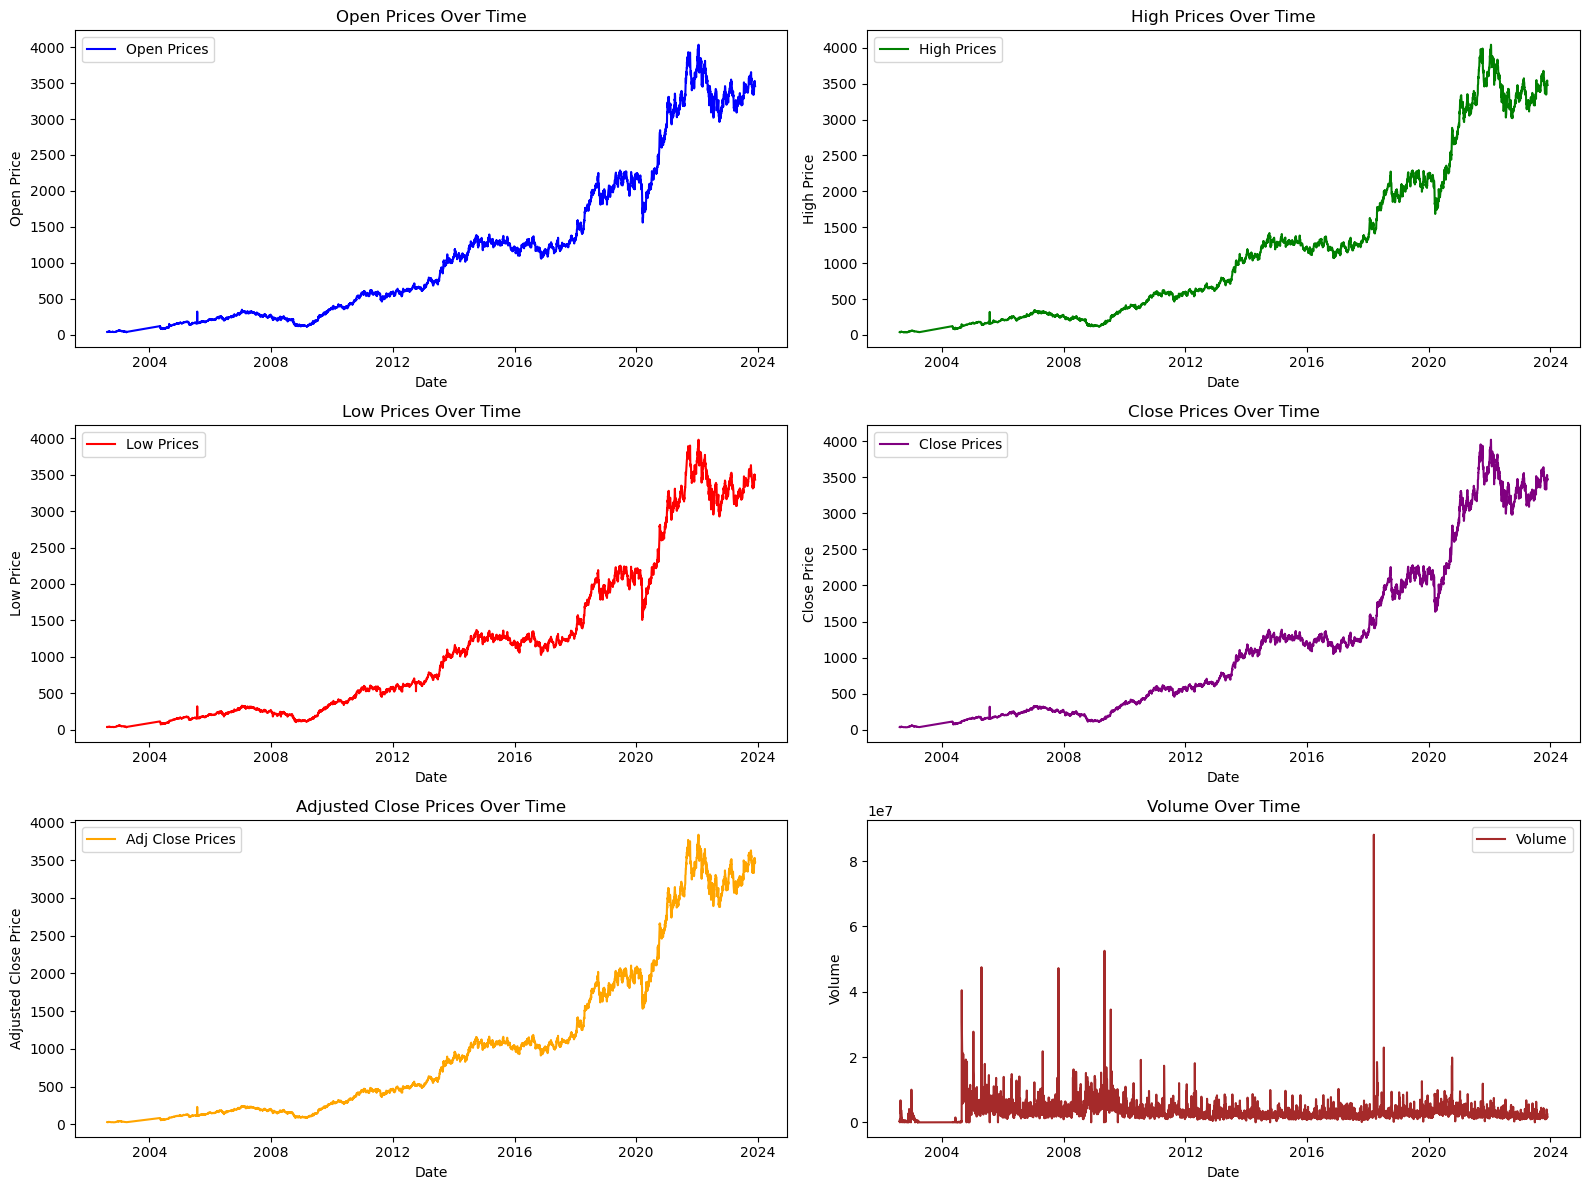

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'
# Ensure that the 'Date' column is set as the index

# Plot each time series
plt.figure(figsize=(16, 12))

# Plot Open Prices
plt.subplot(3, 2, 1)
plt.plot(df.index, df['Open'], label='Open Prices', color='blue')
plt.title('Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

# Plot High Prices
plt.subplot(3, 2, 2)
plt.plot(df.index, df['High'], label='High Prices', color='green')
plt.title('High Prices Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()

# Plot Low Prices
plt.subplot(3, 2, 3)
plt.plot(df.index, df['Low'], label='Low Prices', color='red')
plt.title('Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()

# Plot Close Prices
plt.subplot(3, 2, 4)
plt.plot(df.index, df['Close'], label='Close Prices', color='purple')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Plot Adjusted Close Prices
plt.subplot(3, 2, 5)
plt.plot(df.index, df['Adj Close'], label='Adj Close Prices', color='orange')
plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

# Plot Volume
plt.subplot(3, 2, 6)
plt.plot(df.index, df['Volume'], label='Volume', color='brown')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [47]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='Candlestick Chart for Stock Prices',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)

fig.show()

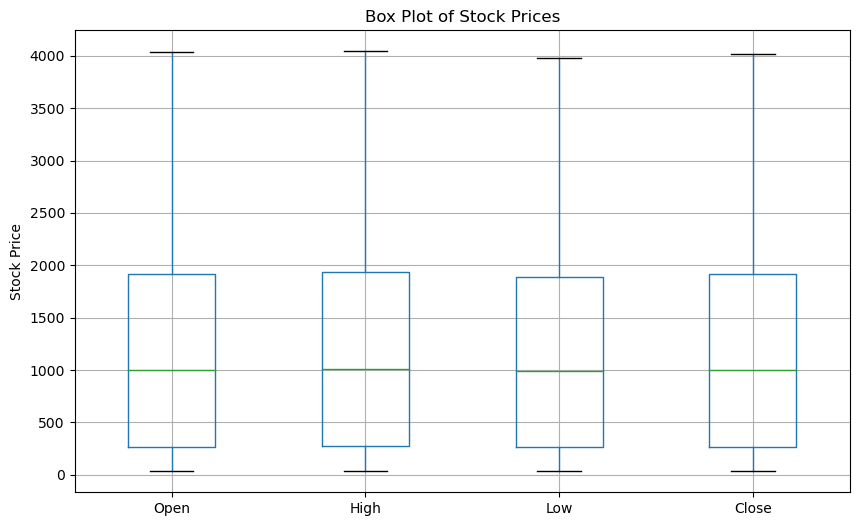

In [48]:
plt.figure(figsize=(10, 6))
df[['Open', 'High', 'Low', 'Close']].boxplot()
plt.title('Box Plot of Stock Prices')
plt.ylabel('Stock Price')
plt.show()

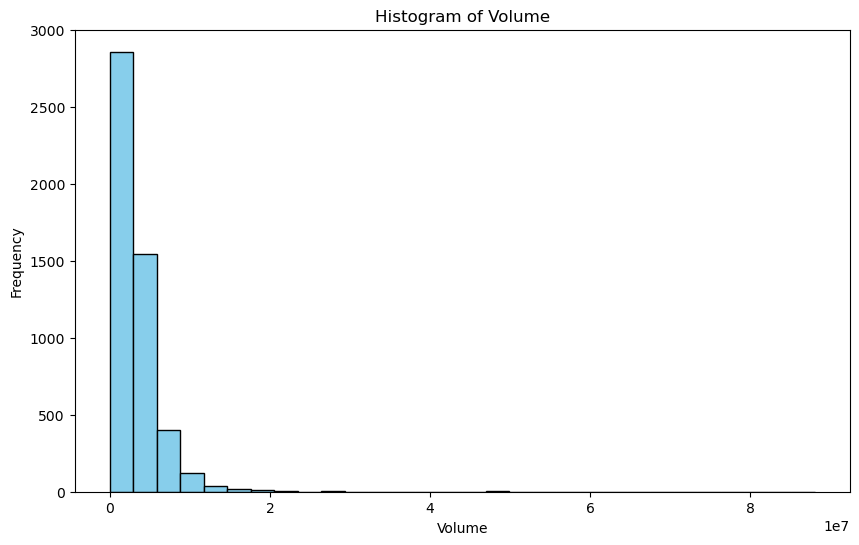

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df['Volume'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

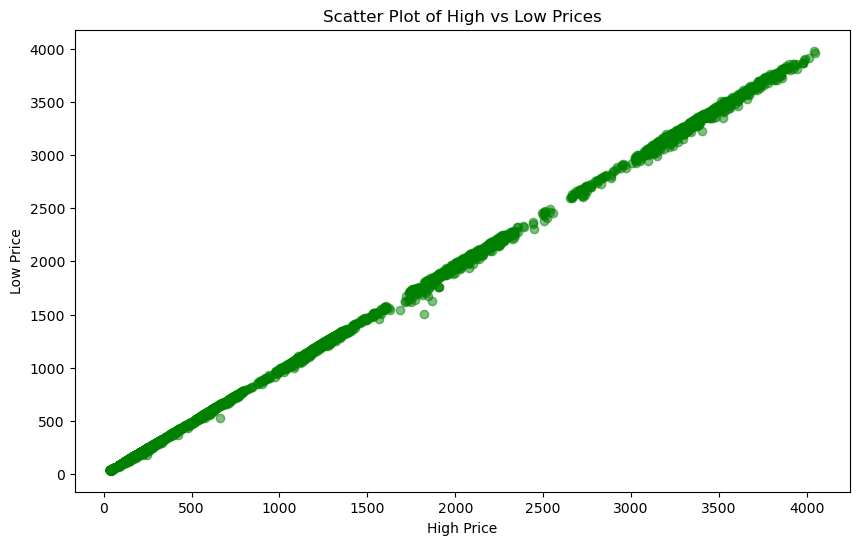

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df['High'], df['Low'], color='green', alpha=0.5)
plt.title('Scatter Plot of High vs Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

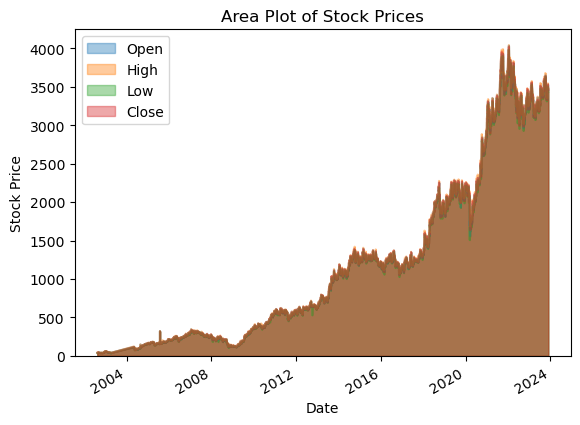

In [51]:
plt.figure(figsize=(10, 6))
df[['Open', 'High', 'Low', 'Close']].plot.area(stacked=False, alpha=0.4)
plt.title('Area Plot of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

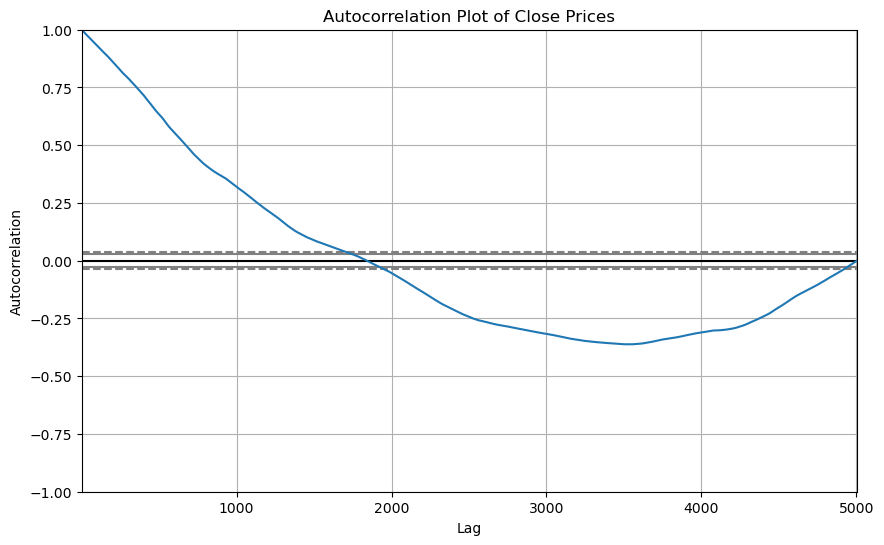

In [52]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot of Close Prices')
plt.show()

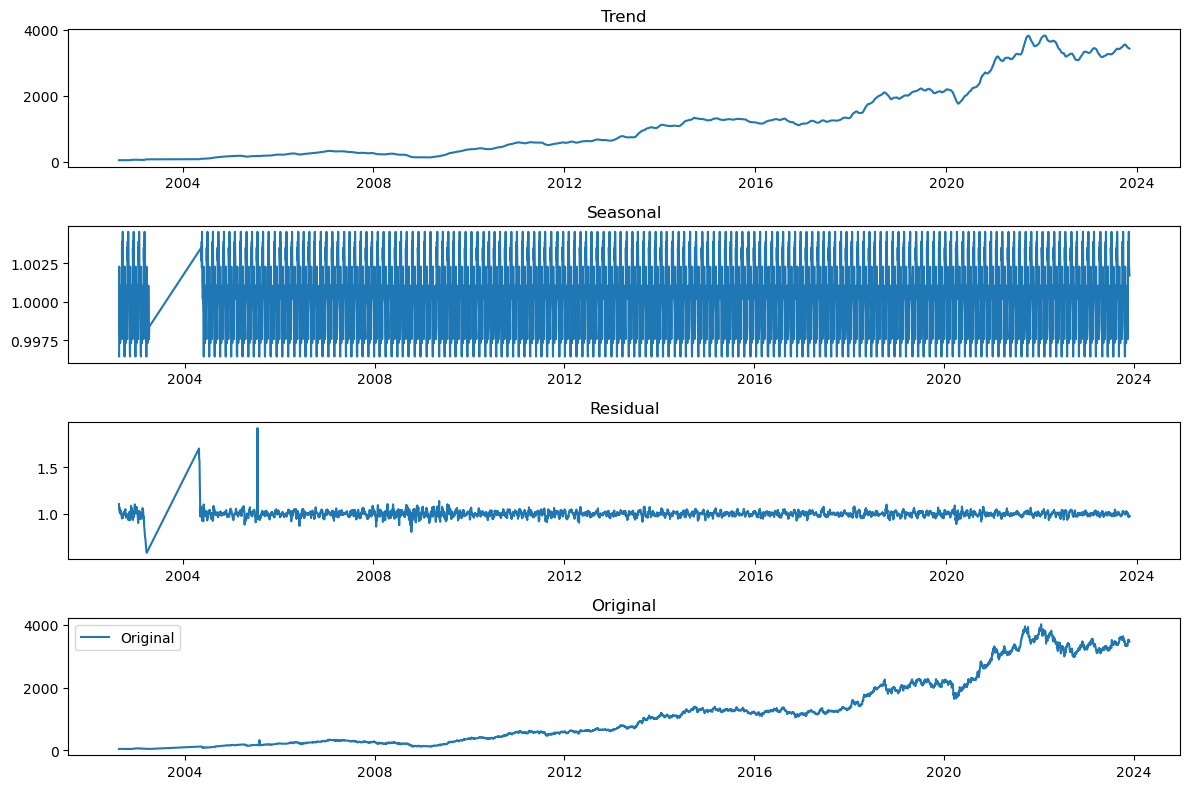

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=30)  # Assuming a period of 30 for seasonality

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')

plt.subplot(4, 1, 4)
plt.plot(df['Close'], label='Original')
plt.title('Original')
plt.legend()

plt.tight_layout()
plt.show()

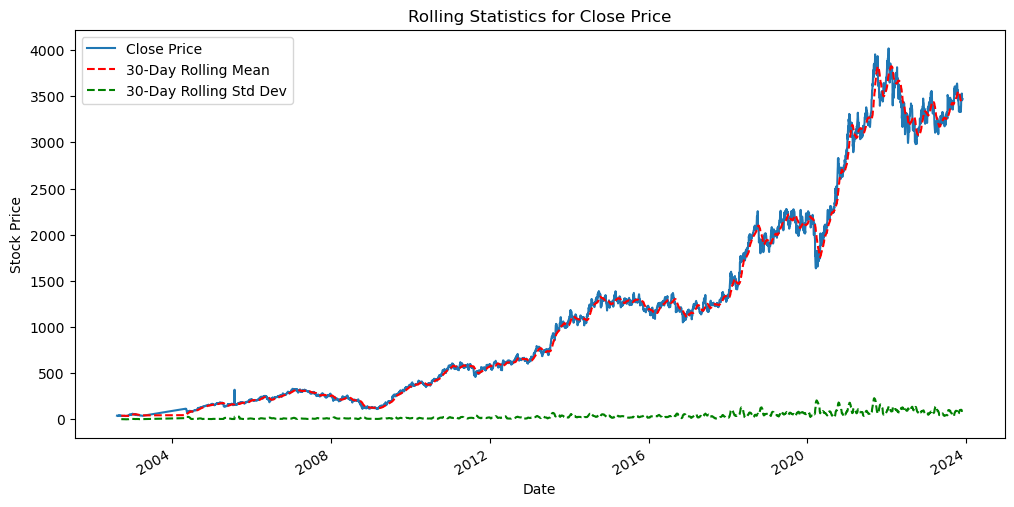

In [54]:
plt.figure(figsize=(12, 6))

df['Close'].plot(label='Close Price')
df['Close'].rolling(window=30).mean().plot(label='30-Day Rolling Mean', linestyle='--', color='red')
df['Close'].rolling(window=30).std().plot(label='30-Day Rolling Std Dev', linestyle='--', color='green')

plt.title('Rolling Statistics for Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

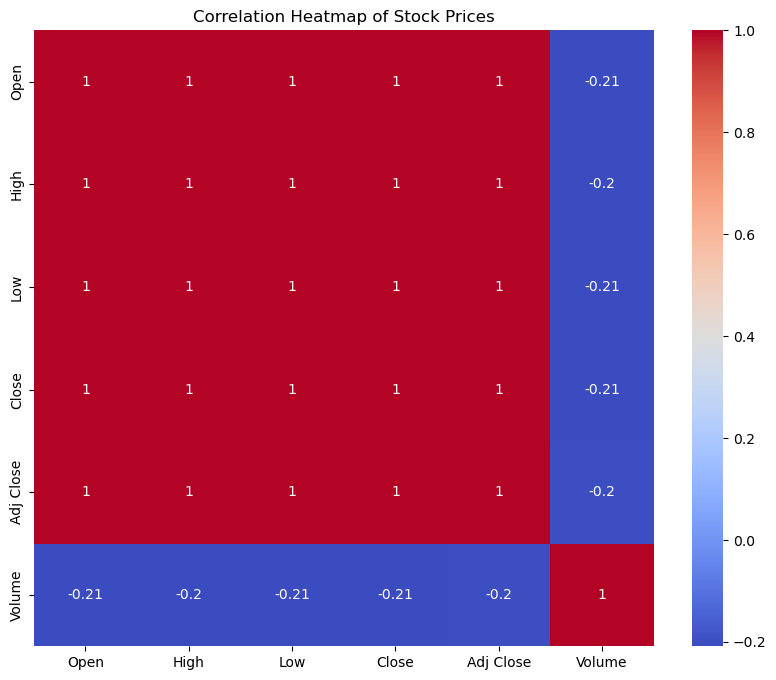

In [57]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Stock Prices')
plt.show()

In [19]:
data = df['Close'].values.reshape(-1, 1)

In [20]:
data

array([[  39.70000076],
       [  39.16249847],
       [  36.46250153],
       ...,
       [3508.25      ],
       [3457.10009766],
       [3470.14990234]])

In [21]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Data Splitting

In [22]:
# Convert the dataset to a supervised learning problem
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [23]:
# Set the number of time steps
time_steps = 30

In [24]:
# Create the supervised learning dataset
X, Y = create_dataset(data_normalized, time_steps)

In [25]:
X

array([[1.06057909e-03, 9.25652843e-04, 2.47887460e-04, ...,
        1.15785127e-03, 1.07313012e-03, 9.09963812e-04],
       [9.25652843e-04, 2.47887460e-04, 2.47887460e-04, ...,
        1.07313012e-03, 9.09963812e-04, 7.43660464e-04],
       [2.47887460e-04, 2.47887460e-04, 2.25922433e-04, ...,
        9.09963812e-04, 7.43660464e-04, 4.17328805e-04],
       ...,
       [9.02037689e-01, 8.97268223e-01, 8.80361760e-01, ...,
        8.74600760e-01, 8.72241093e-01, 8.77249020e-01],
       [8.97268223e-01, 8.80361760e-01, 8.87465766e-01, ...,
        8.72241093e-01, 8.77249020e-01, 8.71751608e-01],
       [8.80361760e-01, 8.87465766e-01, 8.75717807e-01, ...,
        8.77249020e-01, 8.71751608e-01, 8.58911729e-01]])

In [27]:
Y

array([7.43660464e-04, 4.17328805e-04, 4.89497966e-04, ...,
       8.71751608e-01, 8.58911729e-01, 8.62187550e-01])

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [29]:
X_train

array([[1.06057909e-03, 9.25652843e-04, 2.47887460e-04, ...,
        1.15785127e-03, 1.07313012e-03, 9.09963812e-04],
       [9.25652843e-04, 2.47887460e-04, 2.47887460e-04, ...,
        1.07313012e-03, 9.09963812e-04, 7.43660464e-04],
       [2.47887460e-04, 2.47887460e-04, 2.25922433e-04, ...,
        9.09963812e-04, 7.43660464e-04, 4.17328805e-04],
       ...,
       [5.05117762e-01, 4.98189492e-01, 4.94260953e-01, ...,
        5.31450269e-01, 5.20455384e-01, 5.20392628e-01],
       [4.98189492e-01, 4.94260953e-01, 4.89842927e-01, ...,
        5.20455384e-01, 5.20392628e-01, 5.22789924e-01],
       [4.94260953e-01, 4.89842927e-01, 4.98415420e-01, ...,
        5.20392628e-01, 5.22789924e-01, 5.11142350e-01]])

In [30]:
Y_train

array([7.43660464e-04, 4.17328805e-04, 4.89497966e-04, ...,
       5.22789924e-01, 5.11142350e-01, 5.13602403e-01])

In [31]:
X_test

array([[0.48984293, 0.49841542, 0.50250713, ..., 0.52278992, 0.51114235,
        0.5136024 ],
       [0.49841542, 0.50250713, 0.50479145, ..., 0.51114235, 0.5136024 ,
        0.5048542 ],
       [0.50250713, 0.50479145, 0.5009131 , ..., 0.5136024 , 0.5048542 ,
        0.50677455],
       ...,
       [0.90203769, 0.89726822, 0.88036176, ..., 0.87460076, 0.87224109,
        0.87724902],
       [0.89726822, 0.88036176, 0.88746577, ..., 0.87224109, 0.87724902,
        0.87175161],
       [0.88036176, 0.88746577, 0.87571781, ..., 0.87724902, 0.87175161,
        0.85891173]])

In [32]:
Y_test

array([0.5048542 , 0.50677455, 0.51256068, 0.50651096, 0.49842798,
       0.50594616, 0.51284933, 0.52359319, 0.52417056, 0.50831832,
       0.49636956, 0.50366184, 0.49839032, 0.5110294 , 0.52496126,
       0.53455038, 0.53525327, 0.55064108, 0.54909724, 0.55130627,
       0.54726481, 0.54383829, 0.54297227, 0.53913158, 0.53373456,
       0.53521564, 0.53271789, 0.54351195, 0.54346175, 0.54481732,
       0.55721791, 0.54695103, 0.5467502 , 0.54092644, 0.54508085,
       0.55010134, 0.55308857, 0.5481434 , 0.53590595, 0.53608166,
       0.54508085, 0.54107702, 0.53918177, 0.5356298 , 0.53926966,
       0.53195232, 0.52774766, 0.5129874 , 0.51887392, 0.5201918 ,
       0.52993156, 0.52536292, 0.52742131, 0.53379731, 0.53165104,
       0.53600634, 0.54132805, 0.53938261, 0.54416464, 0.54730244,
       0.54243259, 0.53250456, 0.52209961, 0.53234136, 0.52417056,
       0.51962699, 0.49318157, 0.49347025, 0.50223098, 0.51402913,
       0.52453453, 0.5223757 , 0.48620307, 0.48152146, 0.43537

In [33]:
# Reshape the input data for LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [34]:
X_train

array([[[1.06057909e-03],
        [9.25652843e-04],
        [2.47887460e-04],
        ...,
        [1.15785127e-03],
        [1.07313012e-03],
        [9.09963812e-04]],

       [[9.25652843e-04],
        [2.47887460e-04],
        [2.47887460e-04],
        ...,
        [1.07313012e-03],
        [9.09963812e-04],
        [7.43660464e-04]],

       [[2.47887460e-04],
        [2.47887460e-04],
        [2.25922433e-04],
        ...,
        [9.09963812e-04],
        [7.43660464e-04],
        [4.17328805e-04]],

       ...,

       [[5.05117762e-01],
        [4.98189492e-01],
        [4.94260953e-01],
        ...,
        [5.31450269e-01],
        [5.20455384e-01],
        [5.20392628e-01]],

       [[4.98189492e-01],
        [4.94260953e-01],
        [4.89842927e-01],
        ...,
        [5.20455384e-01],
        [5.20392628e-01],
        [5.22789924e-01]],

       [[4.94260953e-01],
        [4.89842927e-01],
        [4.98415420e-01],
        ...,
        [5.20392628e-01],
        [5.2278

In [35]:
X_test

array([[[0.48984293],
        [0.49841542],
        [0.50250713],
        ...,
        [0.52278992],
        [0.51114235],
        [0.5136024 ]],

       [[0.49841542],
        [0.50250713],
        [0.50479145],
        ...,
        [0.51114235],
        [0.5136024 ],
        [0.5048542 ]],

       [[0.50250713],
        [0.50479145],
        [0.5009131 ],
        ...,
        [0.5136024 ],
        [0.5048542 ],
        [0.50677455]],

       ...,

       [[0.90203769],
        [0.89726822],
        [0.88036176],
        ...,
        [0.87460076],
        [0.87224109],
        [0.87724902]],

       [[0.89726822],
        [0.88036176],
        [0.88746577],
        ...,
        [0.87224109],
        [0.87724902],
        [0.87175161]],

       [[0.88036176],
        [0.88746577],
        [0.87571781],
        ...,
        [0.87724902],
        [0.87175161],
        [0.85891173]]])

# Model Building

# Long Short-Term Memory(LSTM)

In [36]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions_actual = scaler.inverse_transform(predictions)
Y_test_actual = scaler.inverse_transform(np.array([Y_test]).reshape(-1, 1))

# Evaluate the model performance
mse = mean_squared_error(Y_test_actual, predictions_actual)
print(f"Mean Squared Error: {mse}")

Epoch 1/50
125/125 [==============================] - 14s 37ms/step - loss: 0.0023
Epoch 2/50
125/125 [==============================] - 5s 37ms/step - loss: 1.0943e-04
Epoch 3/50
125/125 [==============================] - 5s 37ms/step - loss: 1.1599e-04
Epoch 4/50
125/125 [==============================] - 5s 37ms/step - loss: 1.1201e-04
Epoch 5/50
125/125 [==============================] - 5s 36ms/step - loss: 1.1552e-04
Epoch 6/50
125/125 [==============================] - 5s 37ms/step - loss: 1.1722e-04
Epoch 7/50
125/125 [==============================] - 5s 37ms/step - loss: 9.1193e-05
Epoch 8/50
125/125 [==============================] - 5s 38ms/step - loss: 1.1388e-04
Epoch 9/50
125/125 [==============================] - 5s 38ms/step - loss: 8.6661e-05
Epoch 10/50
125/125 [==============================] - 5s 37ms/step - loss: 8.6733e-05
Epoch 11/50
125/125 [==============================] - 5s 37ms/step - loss: 8.2861e-05
Epoch 12/50
125/125 [==============================] - 

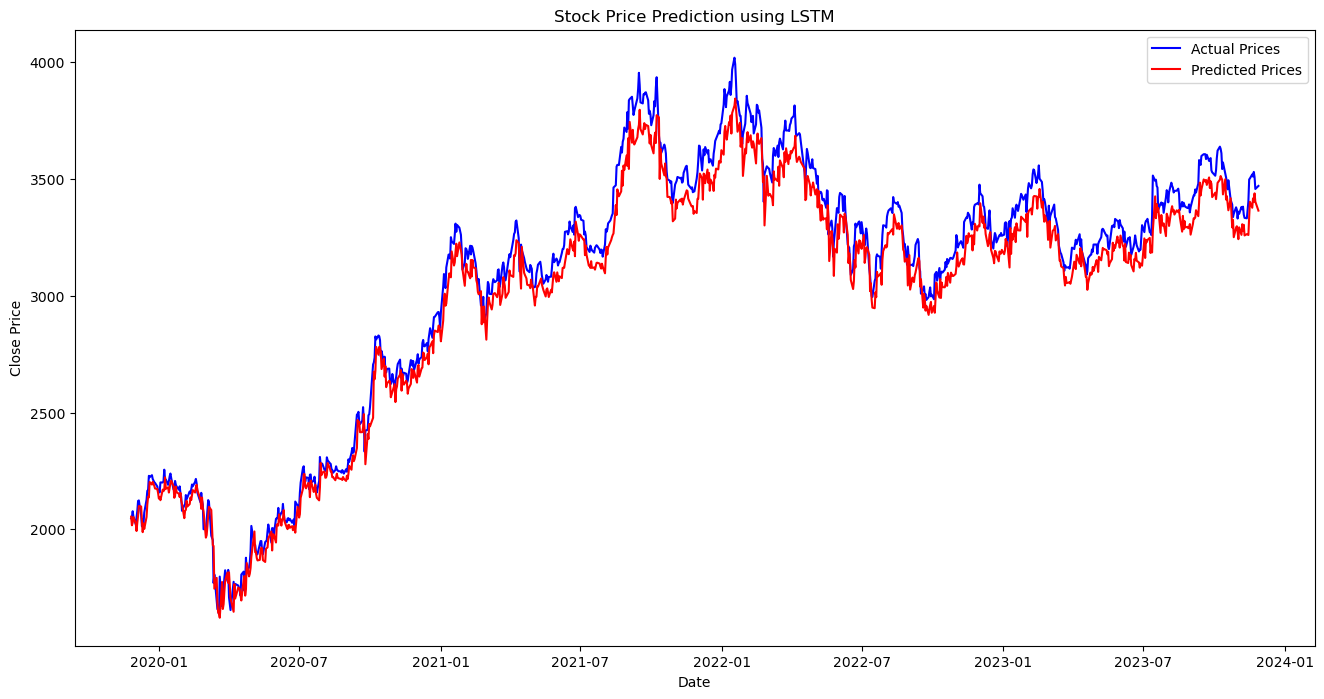

In [38]:
# Visualize the results
plt.figure(figsize=(16, 8))
plt.plot(df.index[-len(Y_test_actual):], Y_test_actual, label='Actual Prices', color='blue')
plt.plot(df.index[-len(predictions_actual):], predictions_actual, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

156/156 [==============================] - 3s 20ms/step


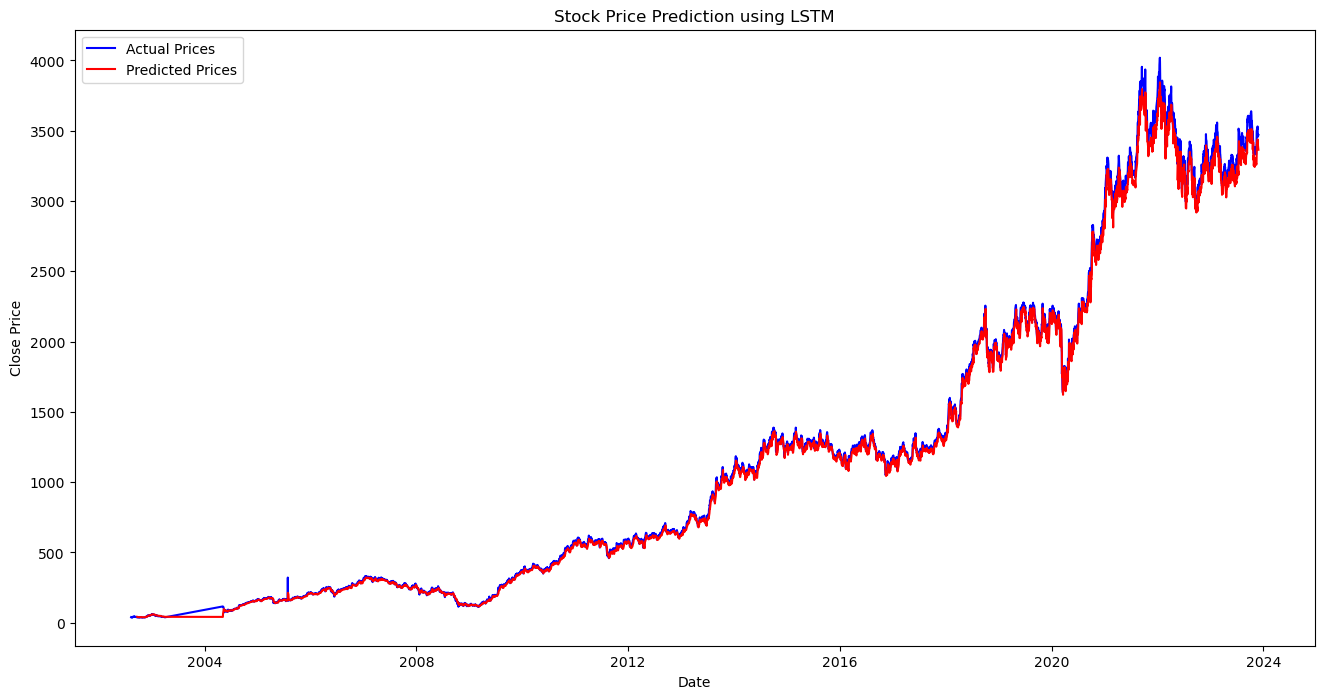

In [40]:
# Visualize the results on the entire dataset
predictions_full = model.predict(X.reshape(X.shape[0], X.shape[1], 1))
predictions_actual_full = scaler.inverse_transform(predictions_full)

plt.figure(figsize=(16, 8))
plt.plot(df.index[-len(data):], data, label='Actual Prices', color='blue')
plt.plot(df.index[-len(predictions_actual_full):], predictions_actual_full, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Thank You!